In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('./data/Affairs.csv')

df.drop('Unnamed: 0', axis = 1, inplace = True)

df.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,male,37.0,10.00,no,3,18,7,4
1,0,female,27.0,4.00,no,4,14,6,4
2,0,female,32.0,15.00,yes,1,12,1,4
3,0,male,57.0,15.00,yes,5,18,6,5
4,0,male,22.0,0.75,no,2,17,6,3


In [20]:
df.gender.value_counts()

0    315
1    286
Name: gender, dtype: int64

In [21]:
df.isna().sum()

affairs          0
gender           0
age              0
yearsmarried     0
children         0
religiousness    0
education        0
occupation       0
rating           0
dtype: int64

In [52]:
cat_df = df.copy()
# encoding affair as binary categorical variable to look for differences in groupings
cat_df.affairs = (cat_df.affairs > 0).replace({True: 1, False: 0})
cat_df.gender.replace({'female': 0, 'male': 1}, inplace = True)
cat_df.children.replace({'no': 0, 'yes': 1}, inplace = True)

cat_df.groupby('affairs').mean()

,gender,age,yearsmarried,children,religiousness,education,occupation,rating
affairs,,,,,,,,
0,0.461197,32.18071,7.727279,0.68071,3.203991,16.139690,4.155211,4.093126
1,0.520000,33.41000,9.531947,0.82000,2.853333,16.246667,4.313333,3.446667


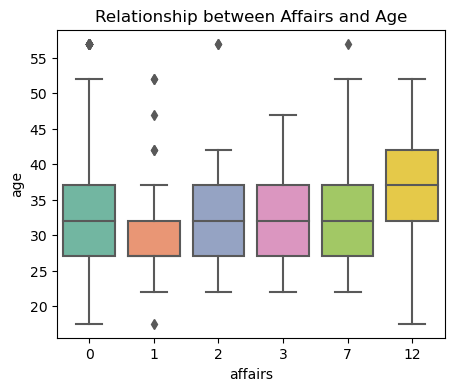

In [36]:
plt.figure(figsize = (5,4))

plt.title("Relationship between Affairs and Age")
sns.boxplot(x = df.affairs, y = df.age, palette = 'Set2')

plt.show()

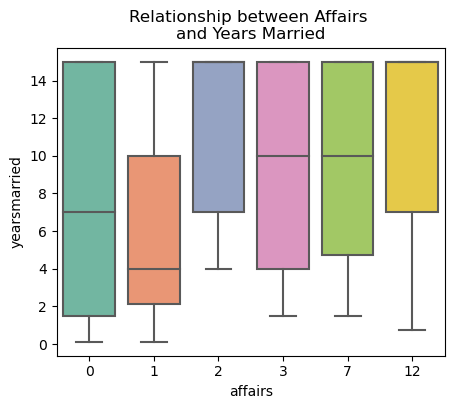

In [42]:
plt.figure(figsize = (5,4))

plt.title("Relationship between Affairs \nand Years Married")
sns.boxplot(x = df.affairs, y = df.yearsmarried, palette = 'Set2')

plt.show()

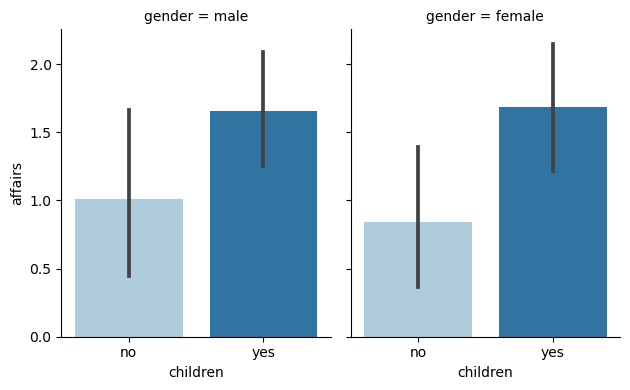

In [55]:
# who's more likely to cheat, men with kids or women with kids?
sns.catplot(data = df, x = 'children', y = 'affairs', col = 'gender',
            kind = 'bar', palette = 'Paired', height = 4, aspect = .8)

plt.show()